In [1]:
#六章学習に関するテクニック
#6.1.2　SGD
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
        
    def update(self,params,grads):
        for key in params.keys():
            params[key]-=self.lr*grads[key]

In [3]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.08666666666666667, test acc:0.0792


epoch:1, train acc:0.09333333333333334, test acc:0.0789


epoch:2, train acc:0.10666666666666667, test acc:0.0853


epoch:3, train acc:0.12, test acc:0.0968


epoch:4, train acc:0.14, test acc:0.1148


epoch:5, train acc:0.17, test acc:0.1364


epoch:6, train acc:0.19333333333333333, test acc:0.158


epoch:7, train acc:0.24333333333333335, test acc:0.1825


epoch:8, train acc:0.27, test acc:0.2121


epoch:9, train acc:0.3233333333333333, test acc:0.2377


epoch:10, train acc:0.35333333333333333, test acc:0.2556


epoch:11, train acc:0.37666666666666665, test acc:0.2668


epoch:12, train acc:0.39, test acc:0.2765


epoch:13, train acc:0.39, test acc:0.2899


epoch:14, train acc:0.42, test acc:0.3017


epoch:15, train acc:0.4266666666666667, test acc:0.3106


epoch:16, train acc:0.43333333333333335, test acc:0.3147


epoch:17, train acc:0.44, test acc:0.319


epoch:18, train acc:0.44, test acc:0.3238


epoch:19, train acc:0.43, test acc:0.3251


epoch:20, train acc:0.46, test acc:0.3283


epoch:21, train acc:0.4766666666666667, test acc:0.3308


epoch:22, train acc:0.4866666666666667, test acc:0.3392


epoch:23, train acc:0.5166666666666667, test acc:0.3488


epoch:24, train acc:0.52, test acc:0.3587


epoch:25, train acc:0.5166666666666667, test acc:0.3616


epoch:26, train acc:0.52, test acc:0.3736


epoch:27, train acc:0.5033333333333333, test acc:0.3545


epoch:28, train acc:0.5266666666666666, test acc:0.3637


epoch:29, train acc:0.55, test acc:0.3736


epoch:30, train acc:0.5333333333333333, test acc:0.3816


epoch:31, train acc:0.5533333333333333, test acc:0.3989


epoch:32, train acc:0.5366666666666666, test acc:0.4054


epoch:33, train acc:0.5566666666666666, test acc:0.4107


epoch:34, train acc:0.5766666666666667, test acc:0.4186


epoch:35, train acc:0.5666666666666667, test acc:0.4269


epoch:36, train acc:0.5833333333333334, test acc:0.436


epoch:37, train acc:0.57, test acc:0.4314


epoch:38, train acc:0.5766666666666667, test acc:0.4397


epoch:39, train acc:0.57, test acc:0.4403


epoch:40, train acc:0.6066666666666667, test acc:0.4697


epoch:41, train acc:0.6133333333333333, test acc:0.4723


epoch:42, train acc:0.5766666666666667, test acc:0.455


epoch:43, train acc:0.6166666666666667, test acc:0.4789


epoch:44, train acc:0.6, test acc:0.4724


epoch:45, train acc:0.6333333333333333, test acc:0.4899


epoch:46, train acc:0.6166666666666667, test acc:0.4937


epoch:47, train acc:0.6333333333333333, test acc:0.5045


epoch:48, train acc:0.6266666666666667, test acc:0.5121


epoch:49, train acc:0.63, test acc:0.5094


epoch:50, train acc:0.63, test acc:0.5036


epoch:51, train acc:0.6366666666666667, test acc:0.5202


epoch:52, train acc:0.6266666666666667, test acc:0.5046


epoch:53, train acc:0.65, test acc:0.53


epoch:54, train acc:0.6366666666666667, test acc:0.5286


epoch:55, train acc:0.6633333333333333, test acc:0.5597


epoch:56, train acc:0.6666666666666666, test acc:0.5507


epoch:57, train acc:0.6766666666666666, test acc:0.5559


epoch:58, train acc:0.6833333333333333, test acc:0.5615


epoch:59, train acc:0.6933333333333334, test acc:0.5828


epoch:60, train acc:0.7, test acc:0.5892


epoch:61, train acc:0.6633333333333333, test acc:0.554


epoch:62, train acc:0.73, test acc:0.6063


epoch:63, train acc:0.7166666666666667, test acc:0.6061


epoch:64, train acc:0.7066666666666667, test acc:0.5816


epoch:65, train acc:0.7266666666666667, test acc:0.6128


epoch:66, train acc:0.7433333333333333, test acc:0.6192


epoch:67, train acc:0.7533333333333333, test acc:0.6336


epoch:68, train acc:0.7566666666666667, test acc:0.6292


epoch:69, train acc:0.7666666666666667, test acc:0.6317


epoch:70, train acc:0.78, test acc:0.6432


epoch:71, train acc:0.77, test acc:0.6348


epoch:72, train acc:0.76, test acc:0.626


epoch:73, train acc:0.7666666666666667, test acc:0.6387


epoch:74, train acc:0.7766666666666666, test acc:0.6413


epoch:75, train acc:0.7733333333333333, test acc:0.6356


epoch:76, train acc:0.7933333333333333, test acc:0.652


epoch:77, train acc:0.7866666666666666, test acc:0.6437


epoch:78, train acc:0.77, test acc:0.6387


epoch:79, train acc:0.7733333333333333, test acc:0.6466


epoch:80, train acc:0.7833333333333333, test acc:0.646


epoch:81, train acc:0.7966666666666666, test acc:0.6583


epoch:82, train acc:0.79, test acc:0.6609


epoch:83, train acc:0.7933333333333333, test acc:0.656


epoch:84, train acc:0.8, test acc:0.6644


epoch:85, train acc:0.79, test acc:0.6642


epoch:86, train acc:0.8, test acc:0.6675


epoch:87, train acc:0.8, test acc:0.667


epoch:88, train acc:0.8233333333333334, test acc:0.6759


epoch:89, train acc:0.8166666666666667, test acc:0.6763


epoch:90, train acc:0.8133333333333334, test acc:0.6679


epoch:91, train acc:0.8233333333333334, test acc:0.6692


epoch:92, train acc:0.8, test acc:0.6719


epoch:93, train acc:0.8133333333333334, test acc:0.6743


epoch:94, train acc:0.8066666666666666, test acc:0.6732


epoch:95, train acc:0.81, test acc:0.6784


epoch:96, train acc:0.82, test acc:0.6719


epoch:97, train acc:0.81, test acc:0.6688


epoch:98, train acc:0.8033333333333333, test acc:0.6667


epoch:99, train acc:0.8266666666666667, test acc:0.6829


epoch:100, train acc:0.82, test acc:0.6845


epoch:101, train acc:0.8266666666666667, test acc:0.6903


epoch:102, train acc:0.8366666666666667, test acc:0.6812


epoch:103, train acc:0.8266666666666667, test acc:0.6831


epoch:104, train acc:0.8266666666666667, test acc:0.6852


epoch:105, train acc:0.83, test acc:0.6916


epoch:106, train acc:0.8366666666666667, test acc:0.6982


epoch:107, train acc:0.8333333333333334, test acc:0.6876


epoch:108, train acc:0.84, test acc:0.6899


epoch:109, train acc:0.8433333333333334, test acc:0.6754


epoch:110, train acc:0.8433333333333334, test acc:0.6902


epoch:111, train acc:0.84, test acc:0.681


epoch:112, train acc:0.8333333333333334, test acc:0.6887


epoch:113, train acc:0.84, test acc:0.6875


epoch:114, train acc:0.8366666666666667, test acc:0.6921


epoch:115, train acc:0.8433333333333334, test acc:0.6976


epoch:116, train acc:0.8433333333333334, test acc:0.7009


epoch:117, train acc:0.8466666666666667, test acc:0.698


epoch:118, train acc:0.8466666666666667, test acc:0.6979


epoch:119, train acc:0.8433333333333334, test acc:0.6968


epoch:120, train acc:0.8466666666666667, test acc:0.7013


epoch:121, train acc:0.85, test acc:0.7033


epoch:122, train acc:0.8566666666666667, test acc:0.7086


epoch:123, train acc:0.85, test acc:0.7045


epoch:124, train acc:0.8633333333333333, test acc:0.7058


epoch:125, train acc:0.8566666666666667, test acc:0.7048


epoch:126, train acc:0.8533333333333334, test acc:0.706


epoch:127, train acc:0.8533333333333334, test acc:0.7032


epoch:128, train acc:0.85, test acc:0.7058


epoch:129, train acc:0.8633333333333333, test acc:0.7003


epoch:130, train acc:0.8633333333333333, test acc:0.7206


epoch:131, train acc:0.8733333333333333, test acc:0.7105


epoch:132, train acc:0.8666666666666667, test acc:0.7018


epoch:133, train acc:0.8633333333333333, test acc:0.7093


epoch:134, train acc:0.85, test acc:0.714


epoch:135, train acc:0.8666666666666667, test acc:0.7172


epoch:136, train acc:0.8533333333333334, test acc:0.7117


epoch:137, train acc:0.86, test acc:0.7146


epoch:138, train acc:0.8633333333333333, test acc:0.7129


epoch:139, train acc:0.8633333333333333, test acc:0.6988


epoch:140, train acc:0.85, test acc:0.7095


epoch:141, train acc:0.8633333333333333, test acc:0.71


epoch:142, train acc:0.86, test acc:0.7045


epoch:143, train acc:0.8666666666666667, test acc:0.7007


epoch:144, train acc:0.8566666666666667, test acc:0.7125


epoch:145, train acc:0.86, test acc:0.7072


epoch:146, train acc:0.8633333333333333, test acc:0.7136


epoch:147, train acc:0.86, test acc:0.7066


epoch:148, train acc:0.8566666666666667, test acc:0.711


epoch:149, train acc:0.8733333333333333, test acc:0.7091


epoch:150, train acc:0.87, test acc:0.7008


epoch:151, train acc:0.8733333333333333, test acc:0.717


epoch:152, train acc:0.8666666666666667, test acc:0.7122


train loss:2.304129000222355


=== epoch:1, train acc:0.09333333333333334, test acc:0.0972 ===
train loss:2.28874514256382
train loss:2.3060178689707285
train loss:2.295930872123633


=== epoch:2, train acc:0.10666666666666667, test acc:0.0982 ===
train loss:2.2995576223173
train loss:2.2961073772956775
train loss:2.2853939369244296


=== epoch:3, train acc:0.10666666666666667, test acc:0.0998 ===
train loss:2.302245749870722
train loss:2.303822775243542
train loss:2.287558129193339


=== epoch:4, train acc:0.10666666666666667, test acc:0.101 ===
train loss:2.3001263789427617
train loss:2.305823491070246
train loss:2.2917506335113678


=== epoch:5, train acc:0.11666666666666667, test acc:0.1034 ===
train loss:2.302177566860261
train loss:2.2984411234919753
train loss:2.3025625897626214


=== epoch:6, train acc:0.11666666666666667, test acc:0.1076 ===
train loss:2.2878352330899223
train loss:2.284466994814503
train loss:2.300044503134523


=== epoch:7, train acc:0.11666666666666667, test acc:0.1099 ===
train loss:2.3041448440709518
train loss:2.284961574269081
train loss:2.2979201105565736


=== epoch:8, train acc:0.13333333333333333, test acc:0.1133 ===
train loss:2.288381210777836
train loss:2.2788930312374456
train loss:2.289646602480059


=== epoch:9, train acc:0.13666666666666666, test acc:0.1185 ===
train loss:2.2972101492220283
train loss:2.290351148312559
train loss:2.2850695354486787


=== epoch:10, train acc:0.14333333333333334, test acc:0.1232 ===
train loss:2.284222033393201
train loss:2.285883480604353
train loss:2.287195912273901


=== epoch:11, train acc:0.14, test acc:0.1268 ===
train loss:2.3011269508876704
train loss:2.2954783102175935
train loss:2.2879330310279484


=== epoch:12, train acc:0.15, test acc:0.1284 ===
train loss:2.281745850825837
train loss:2.2925253577352533
train loss:2.2921349617189226


=== epoch:13, train acc:0.16333333333333333, test acc:0.1328 ===
train loss:2.2961465707575823
train loss:2.292425377290877
train loss:2.291827026981732


=== epoch:14, train acc:0.17, test acc:0.14 ===
train loss:2.2797470209073016
train loss:2.2762026452315918
train loss:2.2811549396279243


=== epoch:15, train acc:0.17, test acc:0.1449 ===
train loss:2.2735588484450937
train loss:2.274914844815365
train loss:2.277418405784235


=== epoch:16, train acc:0.18, test acc:0.1505 ===
train loss:2.2793709256131134
train loss:2.277869002790731
train loss:2.275183063419518


=== epoch:17, train acc:0.19, test acc:0.1537 ===
train loss:2.267817637299292
train loss:2.2848607922804045
train loss:2.2727331234992896


=== epoch:18, train acc:0.19666666666666666, test acc:0.1621 ===
train loss:2.2753092322770057
train loss:2.2722465656324116
train loss:2.284745686758963


=== epoch:19, train acc:0.21666666666666667, test acc:0.1695 ===
train loss:2.2782081779036254
train loss:2.2821170287112444
train loss:2.285444372311164


=== epoch:20, train acc:0.22666666666666666, test acc:0.1747 ===
train loss:2.281352693552315
train loss:2.280631732373188
train loss:2.2808585980486584


=== epoch:21, train acc:0.23666666666666666, test acc:0.1833 ===
train loss:2.279183503493108
train loss:2.2843504035865942
train loss:2.274430699693538


=== epoch:22, train acc:0.24333333333333335, test acc:0.19 ===
train loss:2.2848345915143673
train loss:2.280388535406612
train loss:2.274267326230634


=== epoch:23, train acc:0.25666666666666665, test acc:0.1947 ===
train loss:2.2915377248926005
train loss:2.271838138500626
train loss:2.2778940297664074


=== epoch:24, train acc:0.27, test acc:0.2 ===
train loss:2.2658257761503795
train loss:2.2660347262044356
train loss:2.2681927761509546


=== epoch:25, train acc:0.2866666666666667, test acc:0.2043 ===
train loss:2.270832649438482
train loss:2.2686838235649445
train loss:2.2711925761810297


=== epoch:26, train acc:0.2966666666666667, test acc:0.2087 ===
train loss:2.2663451470639826
train loss:2.266107726917228
train loss:2.2862105378881323


=== epoch:27, train acc:0.3, test acc:0.2093 ===
train loss:2.2715287836739675
train loss:2.27403545087989
train loss:2.2635691399595954


=== epoch:28, train acc:0.29, test acc:0.213 ===
train loss:2.271408334501219
train loss:2.275686517698017
train loss:2.273816777780633


=== epoch:29, train acc:0.29, test acc:0.2171 ===
train loss:2.2705960675825065
train loss:2.2805881162816437
train loss:2.2523160444594463


=== epoch:30, train acc:0.3, test acc:0.2231 ===
train loss:2.269271734604115
train loss:2.260106875358778
train loss:2.2515311026290177


=== epoch:31, train acc:0.3, test acc:0.2257 ===
train loss:2.261173483469637
train loss:2.285200587663792
train loss:2.2616773179682004


=== epoch:32, train acc:0.3, test acc:0.2279 ===
train loss:2.2676392670042
train loss:2.2757570910164207
train loss:2.2836041863920538


=== epoch:33, train acc:0.30333333333333334, test acc:0.2293 ===
train loss:2.271046271267727
train loss:2.267343773311829
train loss:2.269489723325536


=== epoch:34, train acc:0.31333333333333335, test acc:0.2311 ===
train loss:2.263092346613796
train loss:2.271735525316329
train loss:2.2701331110198115


=== epoch:35, train acc:0.30666666666666664, test acc:0.2348 ===
train loss:2.264582936881182
train loss:2.2661828666103223
train loss:2.2601417989903623


=== epoch:36, train acc:0.30666666666666664, test acc:0.2377 ===
train loss:2.2561855150402237
train loss:2.249303173107061
train loss:2.2664397853855762


=== epoch:37, train acc:0.31333333333333335, test acc:0.2391 ===
train loss:2.2659457093251407
train loss:2.249589129340249
train loss:2.259615440872103


=== epoch:38, train acc:0.31666666666666665, test acc:0.2419 ===
train loss:2.263914861765316
train loss:2.247107297296998
train loss:2.268316703801619


=== epoch:39, train acc:0.31333333333333335, test acc:0.2423 ===
train loss:2.273275993397906
train loss:2.261834426433146
train loss:2.2673659698855806


=== epoch:40, train acc:0.31666666666666665, test acc:0.2432 ===
train loss:2.2510839116717274
train loss:2.257096511451229
train loss:2.2587508108668723


=== epoch:41, train acc:0.31666666666666665, test acc:0.2441 ===
train loss:2.2508195046445536
train loss:2.248280384549972
train loss:2.267334004897895


=== epoch:42, train acc:0.31666666666666665, test acc:0.2468 ===
train loss:2.2613366386876668
train loss:2.2566687035287116
train loss:2.24592561990075


=== epoch:43, train acc:0.31666666666666665, test acc:0.2488 ===
train loss:2.26837060019912
train loss:2.266337177324935
train loss:2.2428185113070227


=== epoch:44, train acc:0.31666666666666665, test acc:0.2505 ===
train loss:2.256622616393632
train loss:2.254094955179602
train loss:2.2462669751104682


=== epoch:45, train acc:0.31666666666666665, test acc:0.2533 ===
train loss:2.256523310831034
train loss:2.261773774711924
train loss:2.25762240791069


=== epoch:46, train acc:0.31, test acc:0.2534 ===
train loss:2.2511848205593505
train loss:2.253925758614676
train loss:2.262644209785483


=== epoch:47, train acc:0.31666666666666665, test acc:0.2568 ===
train loss:2.251426514321727
train loss:2.2506199826254
train loss:2.255264306471633


=== epoch:48, train acc:0.32, test acc:0.2579 ===
train loss:2.2583408129198004
train loss:2.2757648349832387
train loss:2.233142142384574


=== epoch:49, train acc:0.3233333333333333, test acc:0.2599 ===
train loss:2.2631666717637433
train loss:2.2396106484144145
train loss:2.2566073678148704


=== epoch:50, train acc:0.3333333333333333, test acc:0.2622 ===
train loss:2.249602821758075
train loss:2.2552997971332247
train loss:2.252316615039649


=== epoch:51, train acc:0.33666666666666667, test acc:0.2621 ===
train loss:2.261371881252641
train loss:2.2388494645710257
train loss:2.2530406858232874


=== epoch:52, train acc:0.3333333333333333, test acc:0.2622 ===
train loss:2.244114490617597
train loss:2.2713877426732623
train loss:2.2388910878853054


=== epoch:53, train acc:0.3333333333333333, test acc:0.2636 ===
train loss:2.246201866822085
train loss:2.2340334687727443
train loss:2.249945580183793


=== epoch:54, train acc:0.33, test acc:0.2656 ===
train loss:2.246178982438332
train loss:2.2585290792666073
train loss:2.2300301801776126


=== epoch:55, train acc:0.3333333333333333, test acc:0.2667 ===
train loss:2.2462267973146663
train loss:2.2346090454345737
train loss:2.240062859747865


=== epoch:56, train acc:0.33, test acc:0.2671 ===
train loss:2.2614589725163188
train loss:2.243732127017662
train loss:2.2336679654967337


=== epoch:57, train acc:0.3333333333333333, test acc:0.2681 ===
train loss:2.2146178240321444
train loss:2.2426639465047185
train loss:2.222208224451896


=== epoch:58, train acc:0.3333333333333333, test acc:0.2692 ===
train loss:2.2371885857358587
train loss:2.244041554060205
train loss:2.241203530816876


=== epoch:59, train acc:0.3333333333333333, test acc:0.2693 ===
train loss:2.2313869248918308
train loss:2.2196288274985623
train loss:2.2339535121432577


=== epoch:60, train acc:0.34, test acc:0.2715 ===
train loss:2.221845426971521
train loss:2.235836475703165
train loss:2.2354105826751094


=== epoch:61, train acc:0.34, test acc:0.2721 ===
train loss:2.2313003900533532
train loss:2.2479520641881114
train loss:2.2237087108184195


=== epoch:62, train acc:0.3466666666666667, test acc:0.2741 ===
train loss:2.2523791185347295
train loss:2.2236841471586173
train loss:2.24036925520831


=== epoch:63, train acc:0.33666666666666667, test acc:0.274 ===
train loss:2.2375512178726855
train loss:2.228958814922949
train loss:2.239346442929836


=== epoch:64, train acc:0.34, test acc:0.2752 ===
train loss:2.2135171575573094
train loss:2.2456160088351833
train loss:2.2428086322511813


=== epoch:65, train acc:0.33666666666666667, test acc:0.2756 ===
train loss:2.2377791316400293
train loss:2.228252444406593
train loss:2.226763425325421


=== epoch:66, train acc:0.33666666666666667, test acc:0.2761 ===
train loss:2.221491288161995
train loss:2.2048385573260694
train loss:2.2310916353000136


=== epoch:67, train acc:0.33666666666666667, test acc:0.2775 ===
train loss:2.2302548924871095
train loss:2.2435372891040735
train loss:2.254724772753513


=== epoch:68, train acc:0.33, test acc:0.2793 ===
train loss:2.250069084037089
train loss:2.246812799747816
train loss:2.22935990714536


=== epoch:69, train acc:0.34, test acc:0.2808 ===
train loss:2.2411378207308825
train loss:2.2181474762233058
train loss:2.2378185529144115


=== epoch:70, train acc:0.3333333333333333, test acc:0.2817 ===
train loss:2.2239604048946555
train loss:2.2468463657265225
train loss:2.2287344999606624


=== epoch:71, train acc:0.33, test acc:0.2811 ===
train loss:2.2592061331369218
train loss:2.227807720062465
train loss:2.227439062980339


=== epoch:72, train acc:0.33, test acc:0.2825 ===
train loss:2.2284965129923466
train loss:2.2223773445145643
train loss:2.228752534299489


=== epoch:73, train acc:0.3333333333333333, test acc:0.2846 ===
train loss:2.228092723004204
train loss:2.235427258555689
train loss:2.221558290344496


=== epoch:74, train acc:0.33, test acc:0.2844 ===
train loss:2.2256670597380763
train loss:2.207532121840035
train loss:2.229207650503011


=== epoch:75, train acc:0.3233333333333333, test acc:0.2853 ===
train loss:2.2053160767500746
train loss:2.2094087712793105
train loss:2.209456555689865


=== epoch:76, train acc:0.32666666666666666, test acc:0.2875 ===
train loss:2.221250143571306
train loss:2.2143578770661074
train loss:2.2338177950093425


=== epoch:77, train acc:0.33666666666666667, test acc:0.2887 ===
train loss:2.1908720785451776
train loss:2.221169268576558
train loss:2.2178341835154036


=== epoch:78, train acc:0.3433333333333333, test acc:0.2913 ===
train loss:2.2214301022972633
train loss:2.186829157431626
train loss:2.2339685173427566


=== epoch:79, train acc:0.33666666666666667, test acc:0.2904 ===
train loss:2.222545515478971
train loss:2.237123138271067
train loss:2.22619516052882


=== epoch:80, train acc:0.34, test acc:0.2918 ===
train loss:2.2140818953297123
train loss:2.1818744042565497
train loss:2.2191374727052295


=== epoch:81, train acc:0.33666666666666667, test acc:0.2911 ===
train loss:2.1984289923454376
train loss:2.211144785665901
train loss:2.2218688254031385


=== epoch:82, train acc:0.34, test acc:0.2938 ===
train loss:2.216177656469493
train loss:2.2059375376266335
train loss:2.202167980513488


=== epoch:83, train acc:0.3466666666666667, test acc:0.2944 ===
train loss:2.201590151733572
train loss:2.216409047027902
train loss:2.228670190942417


=== epoch:84, train acc:0.3466666666666667, test acc:0.2972 ===
train loss:2.20076191409848
train loss:2.208562111295552
train loss:2.1985701840530867


=== epoch:85, train acc:0.3566666666666667, test acc:0.2996 ===
train loss:2.1905355415433423
train loss:2.2229860487479276
train loss:2.1921326922007243


=== epoch:86, train acc:0.3566666666666667, test acc:0.3009 ===
train loss:2.1858038685866314
train loss:2.2121582069276116
train loss:2.206311526245607


=== epoch:87, train acc:0.3566666666666667, test acc:0.3012 ===
train loss:2.198039421597207
train loss:2.2305484552262693
train loss:2.205098706239207


=== epoch:88, train acc:0.36333333333333334, test acc:0.3056 ===
train loss:2.1989158234369355
train loss:2.203777925969864
train loss:2.204966401634858


=== epoch:89, train acc:0.36333333333333334, test acc:0.3081 ===
train loss:2.2262862296299017
train loss:2.182988244630936
train loss:2.228375386316816


=== epoch:90, train acc:0.37, test acc:0.3102 ===
train loss:2.190255983182846
train loss:2.189835065621648
train loss:2.223416653524012


=== epoch:91, train acc:0.37333333333333335, test acc:0.3112 ===
train loss:2.183213476453754
train loss:2.2130771679068513
train loss:2.1782329820178337


=== epoch:92, train acc:0.37666666666666665, test acc:0.3142 ===
train loss:2.20350741251268
train loss:2.2072696510232235
train loss:2.213293102373696


=== epoch:93, train acc:0.38666666666666666, test acc:0.316 ===
train loss:2.1776300692794774
train loss:2.1826127354091387
train loss:2.1927394718793916


=== epoch:94, train acc:0.38, test acc:0.3171 ===
train loss:2.217511833602029
train loss:2.1783938840855392
train loss:2.2064542651919123


=== epoch:95, train acc:0.38, test acc:0.317 ===
train loss:2.2007323240324537
train loss:2.1938865671541494
train loss:2.200917705459384


=== epoch:96, train acc:0.38333333333333336, test acc:0.3184 ===
train loss:2.1900291360670887
train loss:2.1992447286295107
train loss:2.1945038279686373


=== epoch:97, train acc:0.37666666666666665, test acc:0.3183 ===
train loss:2.1712837941784016
train loss:2.2140715003046982
train loss:2.191440136603432


=== epoch:98, train acc:0.38666666666666666, test acc:0.3197 ===
train loss:2.1885936998629454
train loss:2.1609616188698926
train loss:2.202404685212538


=== epoch:99, train acc:0.3933333333333333, test acc:0.3219 ===
train loss:2.1374172899156374
train loss:2.1656020763851376
train loss:2.1921149661022516


=== epoch:100, train acc:0.38333333333333336, test acc:0.3222 ===
train loss:2.1997482556997103
train loss:2.200111776800552
train loss:2.1744493635630073


=== epoch:101, train acc:0.38333333333333336, test acc:0.322 ===
train loss:2.1635294762422648
train loss:2.1946871572826545
train loss:2.1655139843625135


=== epoch:102, train acc:0.39, test acc:0.3241 ===
train loss:2.1478252500994865
train loss:2.189971038856239
train loss:2.1881846585450826


=== epoch:103, train acc:0.39, test acc:0.3268 ===
train loss:2.154662670079814
train loss:2.179508082366242
train loss:2.154119453670535


=== epoch:104, train acc:0.38666666666666666, test acc:0.324 ===
train loss:2.1805274931523555
train loss:2.1592799536144653
train loss:2.1837509617052913


=== epoch:105, train acc:0.38666666666666666, test acc:0.3249 ===
train loss:2.1786254555739166
train loss:2.169269261084827
train loss:2.2014947492395858


=== epoch:106, train acc:0.39, test acc:0.3262 ===
train loss:2.1557604250172018
train loss:2.185457900719774
train loss:2.1731428025889583


=== epoch:107, train acc:0.38666666666666666, test acc:0.3258 ===
train loss:2.157125393363021
train loss:2.162204683933925
train loss:2.1363349000792464


=== epoch:108, train acc:0.39, test acc:0.3276 ===
train loss:2.1508844997935506
train loss:2.166767518103201
train loss:2.1596981475309125


=== epoch:109, train acc:0.39666666666666667, test acc:0.33 ===
train loss:2.167156191261619
train loss:2.152598369254305
train loss:2.1755235346230575


=== epoch:110, train acc:0.4, test acc:0.3308 ===
train loss:2.1522656618981824
train loss:2.1507593616217315
train loss:2.147497066683037


=== epoch:111, train acc:0.3933333333333333, test acc:0.3297 ===
train loss:2.17832026854442
train loss:2.119930881926464
train loss:2.159128904870778


=== epoch:112, train acc:0.4, test acc:0.3314 ===
train loss:2.163593263611411
train loss:2.1550857501177583
train loss:2.135484085485772


=== epoch:113, train acc:0.4, test acc:0.332 ===
train loss:2.1674908458263378
train loss:2.113750293187967
train loss:2.179978198231313


=== epoch:114, train acc:0.4, test acc:0.3336 ===
train loss:2.1805061861374035
train loss:2.174984658682497
train loss:2.1743021558468674


=== epoch:115, train acc:0.4, test acc:0.3358 ===
train loss:2.166593810113279
train loss:2.1340988416262623
train loss:2.1468538552300616


=== epoch:116, train acc:0.4066666666666667, test acc:0.3376 ===
train loss:2.168860697104689
train loss:2.1272923615979904
train loss:2.1742316023069064


=== epoch:117, train acc:0.4066666666666667, test acc:0.3375 ===
train loss:2.1698549538779606
train loss:2.1521136105297702
train loss:2.115642644393248


=== epoch:118, train acc:0.4066666666666667, test acc:0.3378 ===
train loss:2.1401637629646575
train loss:2.112729707667625
train loss:2.1587657422195274


=== epoch:119, train acc:0.41333333333333333, test acc:0.3396 ===
train loss:2.1198457580283874
train loss:2.1543233371300636
train loss:2.124154202413275


=== epoch:120, train acc:0.4066666666666667, test acc:0.3425 ===
train loss:2.171517064628361
train loss:2.1026253481416406
train loss:2.1113537255410435


=== epoch:121, train acc:0.41, test acc:0.3436 ===
train loss:2.107468173770187
train loss:2.1313704626165006
train loss:2.150628082827997


=== epoch:122, train acc:0.41, test acc:0.3449 ===
train loss:2.1317488131389637
train loss:2.1360476990042843
train loss:2.1590463188906934


=== epoch:123, train acc:0.41, test acc:0.3462 ===
train loss:2.0715292733463557
train loss:2.140665081611339
train loss:2.0617556488838384


=== epoch:124, train acc:0.4166666666666667, test acc:0.3459 ===
train loss:2.1019618385039855
train loss:2.1177405805567813
train loss:2.143681453456431


=== epoch:125, train acc:0.42333333333333334, test acc:0.3461 ===
train loss:2.1672845322600263
train loss:2.0848264681066224
train loss:2.1154661175082534


=== epoch:126, train acc:0.42333333333333334, test acc:0.3479 ===
train loss:2.1113875011282417
train loss:2.108558429326772
train loss:2.1302135810261


=== epoch:127, train acc:0.4266666666666667, test acc:0.3471 ===
train loss:2.1351650378501765
train loss:2.104247597976218
train loss:2.1194772008304033


=== epoch:128, train acc:0.43, test acc:0.35 ===
train loss:2.1395435133567124
train loss:2.059809924747909
train loss:2.126748725488138


=== epoch:129, train acc:0.42333333333333334, test acc:0.3494 ===
train loss:2.085575547874183
train loss:2.093965109084102
train loss:2.141502528199856


=== epoch:130, train acc:0.4266666666666667, test acc:0.3509 ===
train loss:2.1349422159428646
train loss:2.1039757340558256
train loss:2.1282745122527986


=== epoch:131, train acc:0.43333333333333335, test acc:0.3509 ===
train loss:2.0859406348171596
train loss:2.105957008584079
train loss:2.077906677971132


=== epoch:132, train acc:0.42333333333333334, test acc:0.3542 ===
train loss:2.1460297345186135
train loss:2.044198706055696
train loss:2.031335838887663


=== epoch:133, train acc:0.43, test acc:0.3536 ===
train loss:2.0796235045733287
train loss:2.131781951128437
train loss:2.102254744733361


=== epoch:134, train acc:0.43, test acc:0.3554 ===
train loss:2.0635603534328535
train loss:2.0715478640152614
train loss:2.1090337256054554


=== epoch:135, train acc:0.42333333333333334, test acc:0.3564 ===
train loss:2.086200126811125
train loss:2.1267574436250256
train loss:2.069696640011729


=== epoch:136, train acc:0.42333333333333334, test acc:0.3569 ===
train loss:2.090774427073529
train loss:2.100512044251752
train loss:2.086865589086656


=== epoch:137, train acc:0.42333333333333334, test acc:0.3585 ===
train loss:2.1129814139111227
train loss:2.0377725924143264
train loss:2.1020546797039827


=== epoch:138, train acc:0.42333333333333334, test acc:0.3577 ===
train loss:2.079978390288495
train loss:2.084137906286288
train loss:2.1606925704962787


=== epoch:139, train acc:0.43666666666666665, test acc:0.3603 ===
train loss:2.042183528682302
train loss:2.0897680406198558
train loss:2.0397020096510783


=== epoch:140, train acc:0.43333333333333335, test acc:0.3615 ===
train loss:2.080975697123798
train loss:2.0863123103626497
train loss:2.139643022271406


=== epoch:141, train acc:0.43333333333333335, test acc:0.3627 ===
train loss:2.057301545787148
train loss:2.0978859366463123
train loss:2.0380012064195996


=== epoch:142, train acc:0.43666666666666665, test acc:0.3639 ===
train loss:2.0605125304417404
train loss:2.0065334209120187
train loss:2.056406471932149


=== epoch:143, train acc:0.43666666666666665, test acc:0.3648 ===
train loss:2.073098271165701
train loss:2.078837032565078
train loss:2.0456819391299215


=== epoch:144, train acc:0.44333333333333336, test acc:0.3664 ===
train loss:2.052780445724504
train loss:2.0948217014846944
train loss:2.068932874564371


=== epoch:145, train acc:0.44666666666666666, test acc:0.3673 ===
train loss:2.0514777976730927
train loss:2.0435798301949415
train loss:2.037223160267462


=== epoch:146, train acc:0.44333333333333336, test acc:0.3667 ===
train loss:2.0672819971818384
train loss:2.0711094609444243
train loss:1.9793429462260597


=== epoch:147, train acc:0.44666666666666666, test acc:0.3653 ===
train loss:1.9864453748633537
train loss:1.9581756725897717
train loss:2.0222442947225305


=== epoch:148, train acc:0.43666666666666665, test acc:0.3653 ===
train loss:1.967624835776914
train loss:1.998113877551373
train loss:2.0113841582998386


=== epoch:149, train acc:0.43, test acc:0.3634 ===
train loss:2.011541090638844
train loss:2.0100733169207485
train loss:1.9693608602701658


=== epoch:150, train acc:0.43, test acc:0.3645 ===
train loss:1.98853208830687
train loss:2.004251606173817
train loss:1.9561628864437994


=== epoch:151, train acc:0.4266666666666667, test acc:0.3655 ===
train loss:2.035181207982049
train loss:2.0479217119165063
train loss:2.0563178539933737


=== epoch:152, train acc:0.4266666666666667, test acc:0.3632 ===
train loss:2.0734546722605014
train loss:2.0255734823932197
train loss:1.9446282121346992


=== epoch:153, train acc:0.43, test acc:0.3655 ===
train loss:2.041970059483481
train loss:2.022526035370585
train loss:1.9650796640032875


=== epoch:154, train acc:0.43, test acc:0.3653 ===
train loss:1.8792130394828055
train loss:2.0287189217331565
train loss:2.0904775928228103


=== epoch:155, train acc:0.44, test acc:0.3678 ===
train loss:1.9500751736785618
train loss:1.9807144271827368
train loss:2.02509183738358


=== epoch:156, train acc:0.44, test acc:0.3679 ===
train loss:1.931502621692091
train loss:2.0140061465353476
train loss:2.0773927386699067


=== epoch:157, train acc:0.44, test acc:0.3692 ===
train loss:2.06030869429774
train loss:2.010320815120434
train loss:1.994617608904805


=== epoch:158, train acc:0.44333333333333336, test acc:0.3717 ===
train loss:2.0254365350993604
train loss:1.9894754565882613
train loss:2.0152871766814373


=== epoch:159, train acc:0.44, test acc:0.3697 ===
train loss:2.0320586436942434
train loss:2.014566552550445
train loss:2.0232055552833996


=== epoch:160, train acc:0.44, test acc:0.3708 ===
train loss:2.069721364456636
train loss:2.010865384882189
train loss:1.925620614554658


=== epoch:161, train acc:0.44333333333333336, test acc:0.3721 ===
train loss:1.9898309200558066
train loss:1.9989830093352474
train loss:2.01422462137437


=== epoch:162, train acc:0.43666666666666665, test acc:0.3746 ===
train loss:1.9953878024149139
train loss:2.0138368320362403
train loss:1.9745937727655538


=== epoch:163, train acc:0.44666666666666666, test acc:0.3777 ===
train loss:1.975108405907362
train loss:1.9632874120498247
train loss:1.896598530590902


=== epoch:164, train acc:0.44666666666666666, test acc:0.3769 ===
train loss:1.90253644048584
train loss:1.9127103098685865
train loss:1.9898444866876608


=== epoch:165, train acc:0.44333333333333336, test acc:0.3753 ===
train loss:1.9634718301836462
train loss:1.9300282870067071
train loss:1.9922065887236444


=== epoch:166, train acc:0.44, test acc:0.3776 ===
train loss:2.0159122212447853
train loss:2.0335464146507536
train loss:1.9782234469619728


=== epoch:167, train acc:0.4533333333333333, test acc:0.3811 ===
train loss:1.9560457224700796
train loss:1.8566499042645548
train loss:1.9204678081313147


=== epoch:168, train acc:0.4533333333333333, test acc:0.3798 ===
train loss:1.9574413652949665
train loss:1.9600686498845814
train loss:1.8957390431155532


=== epoch:169, train acc:0.45666666666666667, test acc:0.3802 ===
train loss:1.918000757309771
train loss:1.9859044968497497
train loss:1.9191655861910102


=== epoch:170, train acc:0.45666666666666667, test acc:0.3803 ===
train loss:1.9172514137540355
train loss:1.9531095997973569
train loss:1.923468189759309


=== epoch:171, train acc:0.45, test acc:0.3796 ===
train loss:1.9383658875450334
train loss:1.9925951722141964
train loss:1.9307002273536988


=== epoch:172, train acc:0.45, test acc:0.3821 ===
train loss:1.8733946529413206
train loss:1.9918903743866727
train loss:1.93066219265213


=== epoch:173, train acc:0.4533333333333333, test acc:0.3817 ===
train loss:1.8588539811206741
train loss:1.9514242479490858
train loss:1.9658283308654934


=== epoch:174, train acc:0.45666666666666667, test acc:0.3826 ===
train loss:1.9424782312375326
train loss:1.8878720297721774
train loss:1.8443082729945683


=== epoch:175, train acc:0.4533333333333333, test acc:0.3831 ===
train loss:1.8935880131960423
train loss:1.889269823192847
train loss:1.8349834859120802


=== epoch:176, train acc:0.45666666666666667, test acc:0.3855 ===
train loss:1.9279227106834862
train loss:1.891441095132737
train loss:1.9006204494035808


=== epoch:177, train acc:0.45666666666666667, test acc:0.3862 ===
train loss:1.8914419089416037
train loss:1.8969956277702777
train loss:1.9034614606902762


=== epoch:178, train acc:0.45666666666666667, test acc:0.3876 ===
train loss:1.938444244354155
train loss:1.8639339075156796
train loss:1.9040842267161835


=== epoch:179, train acc:0.46, test acc:0.3895 ===
train loss:1.94989139971746
train loss:1.8519139234133561
train loss:1.847533348355656


=== epoch:180, train acc:0.4666666666666667, test acc:0.388 ===
train loss:1.8824947687776403
train loss:1.8357806139685067
train loss:1.8471441285601131


=== epoch:181, train acc:0.47333333333333333, test acc:0.388 ===
train loss:1.862120412647411
train loss:1.8823286314549514
train loss:1.8468804068161615


=== epoch:182, train acc:0.4766666666666667, test acc:0.3912 ===
train loss:1.8544331207715055
train loss:1.8677378494662034
train loss:1.921710753535629


=== epoch:183, train acc:0.48, test acc:0.3932 ===
train loss:1.8231089172896338
train loss:1.8755240276513243
train loss:1.9587511745678718


=== epoch:184, train acc:0.48, test acc:0.3954 ===
train loss:1.7767062938241227
train loss:1.7609153053671265
train loss:1.8345554040547056


=== epoch:185, train acc:0.47333333333333333, test acc:0.3929 ===
train loss:1.8333265926351197
train loss:1.8250336995228817
train loss:1.7815328718883716


=== epoch:186, train acc:0.4766666666666667, test acc:0.394 ===
train loss:1.771858251343324
train loss:1.8971655292176604
train loss:1.8596717363733675


=== epoch:187, train acc:0.48, test acc:0.3955 ===
train loss:1.8335623216289734
train loss:1.8473792045311757
train loss:1.7999231777768785


=== epoch:188, train acc:0.48, test acc:0.3965 ===
train loss:1.8076701644639914
train loss:1.8273765483680515
train loss:1.852979120767348


=== epoch:189, train acc:0.47333333333333333, test acc:0.396 ===
train loss:1.823496364521343
train loss:1.6894326127250066
train loss:1.8182014786196126


=== epoch:190, train acc:0.4766666666666667, test acc:0.3957 ===
train loss:1.7882084664190827
train loss:1.7558591371969887
train loss:1.6850644488111164


=== epoch:191, train acc:0.48, test acc:0.3966 ===
train loss:1.7627628377121585
train loss:1.7976999505942262
train loss:1.889270644403224


=== epoch:192, train acc:0.4766666666666667, test acc:0.3973 ===
train loss:1.7420447559601906
train loss:1.7049971729126867
train loss:1.7611654858307206


=== epoch:193, train acc:0.4766666666666667, test acc:0.3955 ===
train loss:1.7857307442751096
train loss:1.810445858464246
train loss:1.8056908849238735


=== epoch:194, train acc:0.48, test acc:0.3979 ===
train loss:1.7932884766451551
train loss:1.7837504435448093
train loss:1.8314031822650427


=== epoch:195, train acc:0.48333333333333334, test acc:0.3988 ===
train loss:1.816946087412006
train loss:1.8162280617654154
train loss:1.7327330316977787


=== epoch:196, train acc:0.49, test acc:0.3991 ===
train loss:1.824607721757354
train loss:1.8773400108567235
train loss:1.7659985917958887


=== epoch:197, train acc:0.49, test acc:0.4006 ===
train loss:1.7381445647389273
train loss:1.7328072557463634
train loss:1.7866451683784803


=== epoch:198, train acc:0.48333333333333334, test acc:0.3997 ===
train loss:1.8152606486748146
train loss:1.7474568577646274
train loss:1.7923653359321048


=== epoch:199, train acc:0.48333333333333334, test acc:0.4 ===
train loss:1.6215707806165525
train loss:1.691700891582808
train loss:1.81668297663948


=== epoch:200, train acc:0.49333333333333335, test acc:0.401 ===
train loss:1.6977135977059805
train loss:1.8179491131184973
train loss:1.7267988167772361


=== epoch:201, train acc:0.49, test acc:0.4013 ===
train loss:1.7274702545492084
train loss:1.7317257371327053
train loss:1.6898939201640673


=== epoch:202, train acc:0.48, test acc:0.3992 ===
train loss:1.70844334848969
train loss:1.637475595100614
train loss:1.8055342081275523


=== epoch:203, train acc:0.4866666666666667, test acc:0.4013 ===
train loss:1.7148884159664224
train loss:1.7634278181872154
train loss:1.754658050670963


=== epoch:204, train acc:0.49, test acc:0.4001 ===
train loss:1.700561301768059
train loss:1.6140181126720137
train loss:1.705409491792754


=== epoch:205, train acc:0.49, test acc:0.397 ===
train loss:1.7429984679934518
train loss:1.7599132095491905
train loss:1.7091494066903274


=== epoch:206, train acc:0.49666666666666665, test acc:0.3964 ===
train loss:1.650462403362512
train loss:1.7559091281524783
train loss:1.6813260552952969


=== epoch:207, train acc:0.5, test acc:0.4007 ===
train loss:1.64447098060874
train loss:1.6954972666395784
train loss:1.5761412428710841


=== epoch:208, train acc:0.49666666666666665, test acc:0.4017 ===
train loss:1.7314906566739676
train loss:1.640030239357681
train loss:1.7092930890821183


=== epoch:209, train acc:0.49, test acc:0.4071 ===
train loss:1.7684108729840446
train loss:1.6873382493981706
train loss:1.7392657181303108


=== epoch:210, train acc:0.49333333333333335, test acc:0.41 ===
train loss:1.6157727964392832
train loss:1.595272351549674
train loss:1.72719137319426


=== epoch:211, train acc:0.5, test acc:0.4122 ===
train loss:1.7076810566926972
train loss:1.6159113409970294
train loss:1.7641708216375038


=== epoch:212, train acc:0.49666666666666665, test acc:0.4133 ===
train loss:1.681838690127814
train loss:1.5463419171614534
train loss:1.5834254043723575


=== epoch:213, train acc:0.49666666666666665, test acc:0.4105 ===
train loss:1.6769248226526952
train loss:1.6058511981416805
train loss:1.6558572062882317


=== epoch:214, train acc:0.49666666666666665, test acc:0.4099 ===
train loss:1.6349371223350255
train loss:1.6305070291528743
train loss:1.6915485588232786


=== epoch:215, train acc:0.5033333333333333, test acc:0.4077 ===
train loss:1.6297962993823847
train loss:1.573754990586641
train loss:1.7403781762482546


=== epoch:216, train acc:0.5066666666666667, test acc:0.4077 ===
train loss:1.7062580724859584
train loss:1.541198844239059
train loss:1.616261095501309


=== epoch:217, train acc:0.5066666666666667, test acc:0.4123 ===
train loss:1.653454600155729
train loss:1.5303434084059493
train loss:1.5695109441217512


=== epoch:218, train acc:0.5033333333333333, test acc:0.4135 ===
train loss:1.6294275086883878
train loss:1.4667141578861222
train loss:1.7117757545408998


=== epoch:219, train acc:0.5033333333333333, test acc:0.4155 ===
train loss:1.4724756176917766
train loss:1.584864437426858
train loss:1.6735136523014829


=== epoch:220, train acc:0.5033333333333333, test acc:0.417 ===
train loss:1.595709110907415
train loss:1.584216516495079
train loss:1.6468023916756298


=== epoch:221, train acc:0.5066666666666667, test acc:0.4157 ===
train loss:1.5834596901300642
train loss:1.5195940968513986
train loss:1.5665644395610625


=== epoch:222, train acc:0.5133333333333333, test acc:0.4173 ===
train loss:1.6284451419603556
train loss:1.576918178169787
train loss:1.5277617834384585


=== epoch:223, train acc:0.5166666666666667, test acc:0.4198 ===
train loss:1.5712542171851052
train loss:1.6112920271927462
train loss:1.708086712073095


=== epoch:224, train acc:0.5133333333333333, test acc:0.4209 ===
train loss:1.6321117922085266
train loss:1.5459799743790859
train loss:1.4970843243280485


=== epoch:225, train acc:0.5166666666666667, test acc:0.4212 ===
train loss:1.49985088992879
train loss:1.5739107415894207
train loss:1.5483859417131456


=== epoch:226, train acc:0.5233333333333333, test acc:0.4233 ===
train loss:1.5398549619821182
train loss:1.6529748934150024
train loss:1.5842825913565495


=== epoch:227, train acc:0.5233333333333333, test acc:0.4254 ===
train loss:1.454710162031757
train loss:1.639358425357542
train loss:1.6262346161390562


=== epoch:228, train acc:0.5166666666666667, test acc:0.4271 ===
train loss:1.603845424915068
train loss:1.4693240563897054
train loss:1.3317853004241977


=== epoch:229, train acc:0.5233333333333333, test acc:0.4308 ===
train loss:1.5092424202467811
train loss:1.6587702754469598
train loss:1.610202365869718


=== epoch:230, train acc:0.53, test acc:0.4329 ===
train loss:1.4552543225351156
train loss:1.557572556296752
train loss:1.4644362941844986


=== epoch:231, train acc:0.5333333333333333, test acc:0.4344 ===
train loss:1.4586966232772454
train loss:1.4529449923719437
train loss:1.4712939190369576


=== epoch:232, train acc:0.5366666666666666, test acc:0.4357 ===
train loss:1.4031445452656766
train loss:1.5011903677919534
train loss:1.5241051315405878


=== epoch:233, train acc:0.5366666666666666, test acc:0.4374 ===
train loss:1.5013248171365172
train loss:1.4850653340659061
train loss:1.524268225439057


=== epoch:234, train acc:0.5433333333333333, test acc:0.4401 ===
train loss:1.4514991803648514
train loss:1.5924483937898044
train loss:1.4875495055195314


=== epoch:235, train acc:0.5466666666666666, test acc:0.4432 ===
train loss:1.4893493563715219
train loss:1.4845359499586528
train loss:1.4537401505916459


=== epoch:236, train acc:0.5466666666666666, test acc:0.4428 ===
train loss:1.4712796537359156
train loss:1.4412671861745627
train loss:1.3776494213622241


=== epoch:237, train acc:0.5433333333333333, test acc:0.4423 ===
train loss:1.5970181146943105
train loss:1.4532092642387386
train loss:1.391838898370249


=== epoch:238, train acc:0.5533333333333333, test acc:0.4444 ===
train loss:1.464080425451526
train loss:1.490141686362988
train loss:1.5020691598838218


=== epoch:239, train acc:0.5533333333333333, test acc:0.4462 ===
train loss:1.5731859909154544
train loss:1.38768610468168
train loss:1.2625648624156398


=== epoch:240, train acc:0.5533333333333333, test acc:0.446 ===
train loss:1.4726268663744253
train loss:1.44022916968965
train loss:1.3981380132349137


=== epoch:241, train acc:0.5533333333333333, test acc:0.4497 ===
train loss:1.499805565485552
train loss:1.5268726423538876
train loss:1.270897546002173


=== epoch:242, train acc:0.5566666666666666, test acc:0.452 ===
train loss:1.512022281589363
train loss:1.474160164356698
train loss:1.6153653272784758


=== epoch:243, train acc:0.5566666666666666, test acc:0.4566 ===
train loss:1.44049143285758
train loss:1.4648389247899225
train loss:1.2887551730578004


=== epoch:244, train acc:0.5633333333333334, test acc:0.4579 ===
train loss:1.461515741540268
train loss:1.3628052392833327
train loss:1.415242204304439


=== epoch:245, train acc:0.5633333333333334, test acc:0.4578 ===
train loss:1.502037621972167
train loss:1.5338967874351306
train loss:1.3431129358509093


=== epoch:246, train acc:0.56, test acc:0.4591 ===
train loss:1.4669960845380814
train loss:1.4114387410658134
train loss:1.4155463231062637


=== epoch:247, train acc:0.56, test acc:0.4561 ===
train loss:1.4015735798085327
train loss:1.572199342689571
train loss:1.6273313168040235


=== epoch:248, train acc:0.5666666666666667, test acc:0.4612 ===
train loss:1.3866728104034363
train loss:1.467632204279574
train loss:1.3673795727341982


=== epoch:249, train acc:0.5666666666666667, test acc:0.4621 ===
train loss:1.408326061104016
train loss:1.401961405158196
train loss:1.3623467238274856


=== epoch:250, train acc:0.5633333333333334, test acc:0.4619 ===
train loss:1.4148898233183311
train loss:1.4983819550584323
train loss:1.3553524888037318


=== epoch:251, train acc:0.57, test acc:0.4653 ===
train loss:1.4700831349299661
train loss:1.5162997168269958
train loss:1.4301034827185872


=== epoch:252, train acc:0.57, test acc:0.4691 ===
train loss:1.3290912325368804
train loss:1.398545599310694
train loss:1.3308208818876122


=== epoch:253, train acc:0.58, test acc:0.4697 ===
train loss:1.3993759203866682
train loss:1.3435901465711575
train loss:1.3070029588857808


=== epoch:254, train acc:0.5833333333333334, test acc:0.4725 ===
train loss:1.543117187967624
train loss:1.4316450449131954
train loss:1.4157897083438087


=== epoch:255, train acc:0.5933333333333334, test acc:0.4765 ===
train loss:1.2423656647799923
train loss:1.3034744873073512
train loss:1.4216728317862766


=== epoch:256, train acc:0.5866666666666667, test acc:0.4793 ===
train loss:1.3909375183049753
train loss:1.356880265699641
train loss:1.3324709625509237


=== epoch:257, train acc:0.5866666666666667, test acc:0.4797 ===
train loss:1.3987587682175253
train loss:1.4489916409568204
train loss:1.5165991849058533


=== epoch:258, train acc:0.5966666666666667, test acc:0.4821 ===
train loss:1.4110342827794249
train loss:1.4432754365690048
train loss:1.3701281506985707


=== epoch:259, train acc:0.6033333333333334, test acc:0.4872 ===
train loss:1.2777526026443964
train loss:1.257720043997986
train loss:1.2623001638561941


=== epoch:260, train acc:0.5933333333333334, test acc:0.4845 ===
train loss:1.2704224930627874
train loss:1.3450405012054896
train loss:1.3698229637693586


=== epoch:261, train acc:0.5966666666666667, test acc:0.4854 ===
train loss:1.417949735943198
train loss:1.2791874777006405
train loss:1.5203519635533147


=== epoch:262, train acc:0.59, test acc:0.4859 ===
train loss:1.3075391695979175
train loss:1.3410922147193665
train loss:1.2007066769271322


=== epoch:263, train acc:0.6033333333333334, test acc:0.4879 ===
train loss:1.2775048003956107
train loss:1.2840769654083997
train loss:1.4599829447244272


=== epoch:264, train acc:0.6066666666666667, test acc:0.4918 ===
train loss:1.343229203507385
train loss:1.2801922332116193
train loss:1.2795291061753802


=== epoch:265, train acc:0.6066666666666667, test acc:0.4923 ===
train loss:1.3000324290157372
train loss:1.3146618329097461
train loss:1.3499962136691335


=== epoch:266, train acc:0.6033333333333334, test acc:0.4917 ===
train loss:1.3077529679123046
train loss:1.2846823670746206
train loss:1.152274384533982


=== epoch:267, train acc:0.6066666666666667, test acc:0.4896 ===
train loss:1.294344555062017
train loss:1.3428044313040375
train loss:1.231313794842514


=== epoch:268, train acc:0.6033333333333334, test acc:0.4941 ===
train loss:1.1940635198100171
train loss:1.3532477362821824
train loss:1.2046131951839971


=== epoch:269, train acc:0.61, test acc:0.4938 ===
train loss:1.2238828105742492
train loss:1.259583457861266
train loss:1.3005582130176772


=== epoch:270, train acc:0.6133333333333333, test acc:0.4936 ===
train loss:1.1724107125342704
train loss:1.2475797198303225
train loss:1.283101842668122


=== epoch:271, train acc:0.61, test acc:0.4949 ===
train loss:1.1834684223508698
train loss:1.2468964289454616
train loss:1.2462012146003056


=== epoch:272, train acc:0.6133333333333333, test acc:0.495 ===
train loss:1.3303279648540773
train loss:1.2192320190437966
train loss:1.1859729771706002


=== epoch:273, train acc:0.61, test acc:0.494 ===
train loss:1.3572719690299166
train loss:1.2036410942952072
train loss:1.1149327306582955


=== epoch:274, train acc:0.61, test acc:0.4941 ===
train loss:1.1490252727434738
train loss:1.1729312933973757
train loss:1.2101657101706491


=== epoch:275, train acc:0.6066666666666667, test acc:0.4955 ===
train loss:1.2681044711039677
train loss:1.2150819211764325
train loss:1.3640333418651762


=== epoch:276, train acc:0.6166666666666667, test acc:0.5032 ===
train loss:1.4222603346286837
train loss:1.3342446851688872
train loss:1.216144355739063


=== epoch:277, train acc:0.6266666666666667, test acc:0.5061 ===
train loss:1.1826023339692482
train loss:1.2594434449532452
train loss:1.2332245161893076


=== epoch:278, train acc:0.62, test acc:0.5075 ===
train loss:1.302910136088192
train loss:1.193042877699407
train loss:1.2860114789233215


=== epoch:279, train acc:0.6266666666666667, test acc:0.5099 ===
train loss:1.2629027404754305
train loss:1.3020892406261395
train loss:1.2449547789418205


=== epoch:280, train acc:0.6433333333333333, test acc:0.5164 ===
train loss:1.2427418834611839
train loss:1.2734049431438887
train loss:1.2201269694822579


=== epoch:281, train acc:0.6466666666666666, test acc:0.519 ===
train loss:1.2100337148796994
train loss:1.2244964426544631
train loss:1.2539159235645954


=== epoch:282, train acc:0.6533333333333333, test acc:0.5213 ===
train loss:1.206182127040801
train loss:1.1583365102050647
train loss:1.2775837026056491


=== epoch:283, train acc:0.65, test acc:0.522 ===
train loss:1.1843318947835415
train loss:1.3358844074232636
train loss:1.3052664781571122


=== epoch:284, train acc:0.66, test acc:0.5255 ===
train loss:1.1623707462417197
train loss:1.149975738749796
train loss:1.2028713111269698


=== epoch:285, train acc:0.67, test acc:0.527 ===
train loss:1.1241431367679124
train loss:1.2507589558119603
train loss:1.2891172721825086


=== epoch:286, train acc:0.6666666666666666, test acc:0.5258 ===
train loss:1.150002785691708
train loss:1.230973606887358
train loss:1.2894045806720513


=== epoch:287, train acc:0.6733333333333333, test acc:0.5294 ===
train loss:1.2729775581809448
train loss:1.2816673169620778
train loss:1.2379055347598942


=== epoch:288, train acc:0.68, test acc:0.5344 ===
train loss:1.1480395818989004
train loss:1.0640239616898184
train loss:1.11412633721353


=== epoch:289, train acc:0.67, test acc:0.5342 ===
train loss:1.0237557637304293
train loss:1.1237042010968104
train loss:1.134059814337333


=== epoch:290, train acc:0.67, test acc:0.5314 ===
train loss:1.118486671267489
train loss:1.1837247835418128
train loss:1.2277496776774948


=== epoch:291, train acc:0.67, test acc:0.5365 ===
train loss:1.288275810519978
train loss:1.19721606898021
train loss:1.1703348195910368


=== epoch:292, train acc:0.6733333333333333, test acc:0.5372 ===
train loss:0.971389343592446
train loss:1.070188414863801
train loss:1.1806932998298718


=== epoch:293, train acc:0.6766666666666666, test acc:0.5413 ===
train loss:1.1429838048614953
train loss:1.1187207818798373
train loss:1.1423475494131563


=== epoch:294, train acc:0.6766666666666666, test acc:0.5426 ===
train loss:1.1605551134562602
train loss:1.254887745848006
train loss:1.060267924278574


=== epoch:295, train acc:0.6766666666666666, test acc:0.543 ===
train loss:1.1811274221027057
train loss:1.110903259699817
train loss:1.1712565871504057


=== epoch:296, train acc:0.68, test acc:0.5473 ===
train loss:0.9826458780746558
train loss:1.1416010609353622
train loss:1.078617026126539


=== epoch:297, train acc:0.6866666666666666, test acc:0.5477 ===
train loss:1.1232815620299683
train loss:1.09229251834616
train loss:1.0678693731601734


=== epoch:298, train acc:0.6833333333333333, test acc:0.547 ===
train loss:1.2336733244018065
train loss:1.0841241736464555
train loss:1.0888674228591047


=== epoch:299, train acc:0.6833333333333333, test acc:0.5502 ===
train loss:1.1044622275761231
train loss:1.036557884865923
train loss:1.1505388830712981


=== epoch:300, train acc:0.7, test acc:0.5515 ===
train loss:1.106042292151309
train loss:1.1512376884728839
train loss:1.081891069769377


=== epoch:301, train acc:0.6966666666666667, test acc:0.5553 ===
train loss:1.0826032756117259
train loss:1.023447686076456


=============== Final Test Accuracy ===============
test acc:0.5537


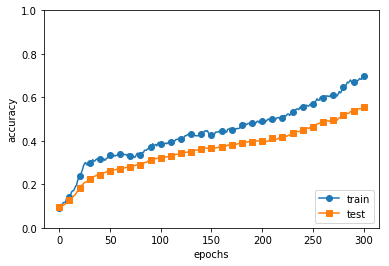

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

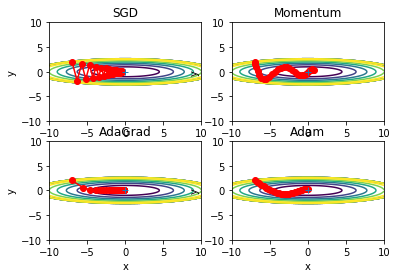

In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

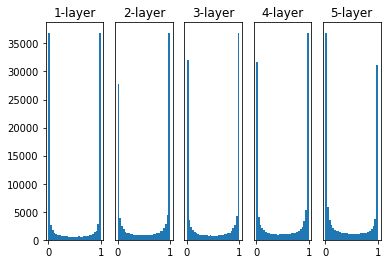

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


===========iteration:0===========
std=0.01:2.302531632664846
Xavier:2.2919413915522715
He:2.352986687822426


===========iteration:100===========
std=0.01:2.300972815658557
Xavier:2.2540916003742675
He:1.3593554946198774


===========iteration:200===========
std=0.01:2.3033536160975916
Xavier:2.1775816541446966
He:0.688423696517142


===========iteration:300===========
std=0.01:2.3029372118924805
Xavier:1.9854251604710496
He:0.5680215637519893


===========iteration:400===========
std=0.01:2.301111357574664
Xavier:1.539490918858144
He:0.5085335756778702


===========iteration:500===========
std=0.01:2.302093960218639
Xavier:1.0379433958027728
He:0.3637030119954725


===========iteration:600===========
std=0.01:2.2981505119492605
Xavier:0.7231590265061176
He:0.29667260188072236


===========iteration:700===========
std=0.01:2.298741606835728
Xavier:0.7268106927148105
He:0.4542690703013886


===========iteration:800===========
std=0.01:2.3000683224462515
Xavier:0.49296258443661745
He:0.3074099751219363


===========iteration:900===========
std=0.01:2.3047418674283158
Xavier:0.48809044437793114
He:0.31341318612799873


===========iteration:1000===========
std=0.01:2.302816510951189
Xavier:0.5041263325802717
He:0.35024066362928385


===========iteration:1100===========
std=0.01:2.3014610745072526
Xavier:0.3730777642872034
He:0.2128341321262327


===========iteration:1200===========
std=0.01:2.296300498254125
Xavier:0.563925715344163
He:0.42180153992056424


===========iteration:1300===========
std=0.01:2.2985139409118345
Xavier:0.3646644422540845
He:0.26340733791224485


===========iteration:1400===========
std=0.01:2.298983522723075
Xavier:0.40616731184423327
He:0.2765368216173507


===========iteration:1500===========
std=0.01:2.301236284909254
Xavier:0.3417404124472766
He:0.20684323817724376


===========iteration:1600===========
std=0.01:2.298335566524298
Xavier:0.5446391161983801
He:0.41306310441065325


===========iteration:1700===========
std=0.01:2.3053562200757254
Xavier:0.4126301274592169
He:0.24555723406782887


===========iteration:1800===========
std=0.01:2.303757759746004
Xavier:0.10896743027470908
He:0.05659438342944252


===========iteration:1900===========
std=0.01:2.2995630042845843
Xavier:0.3052585329692651
He:0.18200620232704895


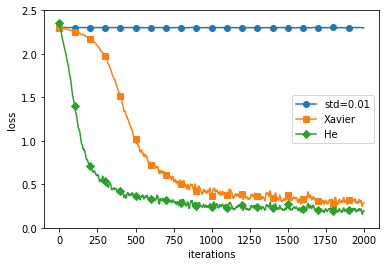

In [7]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.052310236566177615
W3:0.0
b3:1.7990402263745597e-07


============== 1/16 ==============
epoch:0 | 0.117 - 0.101


C:\ProgramData\Anaconda3\lib\site-packages\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:1 | 0.097 - 0.145


epoch:2 | 0.097 - 0.153


epoch:3 | 0.097 - 0.158


epoch:4 | 0.097 - 0.182
epoch:5 | 0.097 - 0.197


epoch:6 | 0.097 - 0.217
epoch:7 | 0.097 - 0.23


epoch:8 | 0.097 - 0.24
epoch:9 | 0.097 - 0.251


epoch:10 | 0.097 - 0.273


epoch:11 | 0.097 - 0.289


epoch:12 | 0.097 - 0.294


epoch:13 | 0.097 - 0.313


epoch:14 | 0.097 - 0.321


epoch:15 | 0.097 - 0.338
epoch:16 | 0.097 - 0.35


epoch:17 | 0.097 - 0.362
epoch:18 | 0.097 - 0.369


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.378
============== 2/16 ==============
epoch:0 | 0.099 - 0.124


epoch:1 | 0.097 - 0.102
epoch:2 | 0.097 - 0.11


epoch:3 | 0.097 - 0.134
epoch:4 | 0.097 - 0.152


epoch:5 | 0.097 - 0.179


epoch:6 | 0.097 - 0.216
epoch:7 | 0.097 - 0.249


epoch:8 | 0.097 - 0.271
epoch:9 | 0.097 - 0.288


epoch:10 | 0.097 - 0.317


epoch:11 | 0.097 - 0.33


epoch:12 | 0.097 - 0.344
epoch:13 | 0.097 - 0.358


epoch:14 | 0.097 - 0.383


epoch:15 | 0.097 - 0.405


epoch:16 | 0.097 - 0.423


epoch:17 | 0.097 - 0.438
epoch:18 | 0.097 - 0.444

No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.468
============== 3/16 ==============
epoch:0 | 0.097 - 0.127


epoch:1 | 0.237 - 0.115


epoch:2 | 0.387 - 0.143


epoch:3 | 0.497 - 0.183


epoch:4 | 0.567 - 0.223


epoch:5 | 0.618 - 0.248


epoch:6 | 0.656 - 0.284


epoch:7 | 0.709 - 0.328


epoch:8 | 0.753 - 0.358


epoch:9 | 0.775 - 0.401


epoch:10 | 0.803 - 0.442


epoch:11 | 0.822 - 0.467


epoch:12 | 0.85 - 0.495


epoch:13 | 0.864 - 0.522


epoch:14 | 0.879 - 0.546


epoch:15 | 0.886 - 0.561


epoch:16 | 0.902 - 0.572


epoch:17 | 0.914 - 0.601


epoch:18 | 0.92 - 0.622


No handles with labels found to put in legend.


epoch:19 | 0.927 - 0.645
============== 4/16 ==============
epoch:0 | 0.134 - 0.151


epoch:1 | 0.263 - 0.15


epoch:2 | 0.371 - 0.204


epoch:3 | 0.482 - 0.276


epoch:4 | 0.549 - 0.343


epoch:5 | 0.632 - 0.411


epoch:6 | 0.655 - 0.471


epoch:7 | 0.694 - 0.535


epoch:8 | 0.714 - 0.573


epoch:9 | 0.741 - 0.613


epoch:10 | 0.759 - 0.649


epoch:11 | 0.78 - 0.678


epoch:12 | 0.8 - 0.704
epoch:13 | 0.811 - 0.732


epoch:14 | 0.824 - 0.758
epoch:15 | 0.838 - 0.768


epoch:16 | 0.844 - 0.78


epoch:17 | 0.849 - 0.804


epoch:18 | 0.858 - 0.822


No handles with labels found to put in legend.


epoch:19 | 0.869 - 0.836
============== 5/16 ==============
epoch:0 | 0.098 - 0.113


epoch:1 | 0.102 - 0.216


epoch:2 | 0.107 - 0.364


epoch:3 | 0.112 - 0.465


epoch:4 | 0.112 - 0.537


epoch:5 | 0.118 - 0.601


epoch:6 | 0.131 - 0.663


epoch:7 | 0.132 - 0.699


epoch:8 | 0.146 - 0.731


epoch:9 | 0.157 - 0.758
epoch:10 | 0.173 - 0.775


epoch:11 | 0.197 - 0.809


epoch:12 | 0.217 - 0.825


epoch:13 | 0.266 - 0.834


epoch:14 | 0.303 - 0.842


epoch:15 | 0.316 - 0.852


epoch:16 | 0.325 - 0.861


epoch:17 | 0.351 - 0.873
epoch:18 | 0.381 - 0.885


No handles with labels found to put in legend.


epoch:19 | 0.386 - 0.898
============== 6/16 ==============
epoch:0 | 0.121 - 0.092


epoch:1 | 0.104 - 0.213


epoch:2 | 0.187 - 0.423


epoch:3 | 0.152 - 0.608


epoch:4 | 0.166 - 0.675


epoch:5 | 0.128 - 0.724


epoch:6 | 0.118 - 0.748


epoch:7 | 0.121 - 0.786


epoch:8 | 0.216 - 0.795


epoch:9 | 0.211 - 0.818


epoch:10 | 0.191 - 0.829


epoch:11 | 0.212 - 0.849


epoch:12 | 0.209 - 0.868


epoch:13 | 0.205 - 0.887


epoch:14 | 0.2 - 0.898


epoch:15 | 0.215 - 0.903


epoch:16 | 0.148 - 0.91


epoch:17 | 0.12 - 0.921


epoch:18 | 0.127 - 0.934


No handles with labels found to put in legend.


epoch:19 | 0.124 - 0.937
============== 7/16 ==============
epoch:0 | 0.116 - 0.061


epoch:1 | 0.105 - 0.239


epoch:2 | 0.105 - 0.613


epoch:3 | 0.105 - 0.75


epoch:4 | 0.116 - 0.789


epoch:5 | 0.116 - 0.812
epoch:6 | 0.116 - 0.85


epoch:7 | 0.116 - 0.867


epoch:8 | 0.116 - 0.883
epoch:9 | 0.116 - 0.903


epoch:10 | 0.116 - 0.921


epoch:11 | 0.116 - 0.937


epoch:12 | 0.116 - 0.951


epoch:13 | 0.116 - 0.964


epoch:14 | 0.116 - 0.971


epoch:15 | 0.116 - 0.978


epoch:16 | 0.116 - 0.985


epoch:17 | 0.117 - 0.989


epoch:18 | 0.117 - 0.992


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.994
============== 8/16 ==============
epoch:0 | 0.1 - 0.127


epoch:1 | 0.116 - 0.435


epoch:2 | 0.117 - 0.62


epoch:3 | 0.117 - 0.695


epoch:4 | 0.116 - 0.788


epoch:5 | 0.117 - 0.841


epoch:6 | 0.116 - 0.865


epoch:7 | 0.116 - 0.911


epoch:8 | 0.116 - 0.945


epoch:9 | 0.116 - 0.96


epoch:10 | 0.116 - 0.974


epoch:11 | 0.116 - 0.981


epoch:12 | 0.116 - 0.987


epoch:13 | 0.116 - 0.995


epoch:14 | 0.116 - 0.994


epoch:15 | 0.116 - 0.996


epoch:16 | 0.116 - 0.999


epoch:17 | 0.116 - 1.0


epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 9/16 ==============


epoch:0 | 0.117 - 0.088


epoch:1 | 0.117 - 0.38


epoch:2 | 0.116 - 0.742


epoch:3 | 0.116 - 0.813


epoch:4 | 0.116 - 0.889


epoch:5 | 0.116 - 0.922


epoch:6 | 0.116 - 0.96


epoch:7 | 0.116 - 0.978


epoch:8 | 0.116 - 0.985


epoch:9 | 0.116 - 0.991


epoch:10 | 0.116 - 0.991
epoch:11 | 0.116 - 0.998


epoch:12 | 0.116 - 0.999


epoch:13 | 0.116 - 0.998


epoch:14 | 0.116 - 0.998


epoch:15 | 0.116 - 1.0


epoch:16 | 0.116 - 1.0


epoch:17 | 0.116 - 1.0


epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.14


epoch:1 | 0.117 - 0.631


epoch:2 | 0.117 - 0.814


epoch:3 | 0.117 - 0.877


epoch:4 | 0.117 - 0.913


epoch:5 | 0.117 - 0.923


epoch:6 | 0.117 - 0.858


epoch:7 | 0.117 - 0.943


epoch:8 | 0.117 - 0.977


epoch:9 | 0.117 - 0.981


epoch:10 | 0.117 - 0.982


epoch:11 | 0.117 - 0.992


epoch:12 | 0.117 - 0.994


epoch:13 | 0.117 - 0.997


epoch:14 | 0.117 - 0.998


epoch:15 | 0.117 - 1.0


epoch:16 | 0.117 - 1.0


epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.094 - 0.174


epoch:1 | 0.117 - 0.517


epoch:2 | 0.116 - 0.622


epoch:3 | 0.116 - 0.75


epoch:4 | 0.116 - 0.78


epoch:5 | 0.117 - 0.809


epoch:6 | 0.117 - 0.869


epoch:7 | 0.117 - 0.886


epoch:8 | 0.117 - 0.958


epoch:9 | 0.117 - 0.921


epoch:10 | 0.117 - 0.982


epoch:11 | 0.117 - 0.929


epoch:12 | 0.117 - 0.977


epoch:13 | 0.117 - 0.983


epoch:14 | 0.117 - 0.989


epoch:15 | 0.117 - 0.92


epoch:16 | 0.117 - 0.979


epoch:17 | 0.117 - 0.992


epoch:18 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.993
============== 12/16 ==============
epoch:0 | 0.117 - 0.182


epoch:1 | 0.116 - 0.445


epoch:2 | 0.117 - 0.525


epoch:3 | 0.117 - 0.664


epoch:4 | 0.117 - 0.825


epoch:5 | 0.116 - 0.838


epoch:6 | 0.116 - 0.857


epoch:7 | 0.116 - 0.84


epoch:8 | 0.116 - 0.877


epoch:9 | 0.116 - 0.927


epoch:10 | 0.116 - 0.976


epoch:11 | 0.117 - 0.929


epoch:12 | 0.117 - 0.976


epoch:13 | 0.117 - 0.977


epoch:14 | 0.117 - 0.974


epoch:15 | 0.117 - 0.982


epoch:16 | 0.117 - 0.986


epoch:17 | 0.117 - 0.964
epoch:18 | 0.117 - 0.982


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.982
============== 13/16 ==============
epoch:0 | 0.117 - 0.114


epoch:1 | 0.117 - 0.464


epoch:2 | 0.117 - 0.538


epoch:3 | 0.117 - 0.661
epoch:4 | 0.117 - 0.661


epoch:5 | 0.117 - 0.732


epoch:6 | 0.117 - 0.68


epoch:7 | 0.117 - 0.749
epoch:8 | 0.117 - 0.715


epoch:9 | 0.117 - 0.768


epoch:10 | 0.117 - 0.832
epoch:11 | 0.117 - 0.873


epoch:12 | 0.117 - 0.868


epoch:13 | 0.117 - 0.876


epoch:14 | 0.117 - 0.871


epoch:15 | 0.117 - 0.881


epoch:16 | 0.117 - 0.883


epoch:17 | 0.117 - 0.861


epoch:18 | 0.117 - 0.876


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.83
============== 14/16 ==============
epoch:0 | 0.116 - 0.096


epoch:1 | 0.117 - 0.362


epoch:2 | 0.116 - 0.364


epoch:3 | 0.117 - 0.514


epoch:4 | 0.116 - 0.552


epoch:5 | 0.116 - 0.561


epoch:6 | 0.116 - 0.587


epoch:7 | 0.116 - 0.573


epoch:8 | 0.116 - 0.596


epoch:9 | 0.116 - 0.6


epoch:10 | 0.116 - 0.568


epoch:11 | 0.116 - 0.605


epoch:12 | 0.116 - 0.605


epoch:13 | 0.116 - 0.602


epoch:14 | 0.116 - 0.602


epoch:15 | 0.116 - 0.602


epoch:16 | 0.116 - 0.604


epoch:17 | 0.116 - 0.599


epoch:18 | 0.116 - 0.606


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.604
============== 15/16 ==============
epoch:0 | 0.116 - 0.124


epoch:1 | 0.117 - 0.291


epoch:2 | 0.117 - 0.298


epoch:3 | 0.117 - 0.443


epoch:4 | 0.116 - 0.461


epoch:5 | 0.117 - 0.465


epoch:6 | 0.117 - 0.488


epoch:7 | 0.117 - 0.5


epoch:8 | 0.117 - 0.506


epoch:9 | 0.117 - 0.509


epoch:10 | 0.117 - 0.511


epoch:11 | 0.117 - 0.51


epoch:12 | 0.117 - 0.508


epoch:13 | 0.117 - 0.512


epoch:14 | 0.117 - 0.513


epoch:15 | 0.117 - 0.515


epoch:16 | 0.117 - 0.516


epoch:17 | 0.117 - 0.508


epoch:18 | 0.117 - 0.518


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.51
============== 16/16 ==============
epoch:0 | 0.105 - 0.216


epoch:1 | 0.117 - 0.127


epoch:2 | 0.117 - 0.357


epoch:3 | 0.116 - 0.375


epoch:4 | 0.117 - 0.412


epoch:5 | 0.117 - 0.412


epoch:6 | 0.117 - 0.416


epoch:7 | 0.117 - 0.495


epoch:8 | 0.117 - 0.51


epoch:9 | 0.117 - 0.505


epoch:10 | 0.116 - 0.497


epoch:11 | 0.116 - 0.506


epoch:12 | 0.116 - 0.491


epoch:13 | 0.117 - 0.273


epoch:14 | 0.117 - 0.513


epoch:15 | 0.117 - 0.515


epoch:16 | 0.117 - 0.524


epoch:17 | 0.116 - 0.524


epoch:18 | 0.117 - 0.521


epoch:19 | 0.117 - 0.523


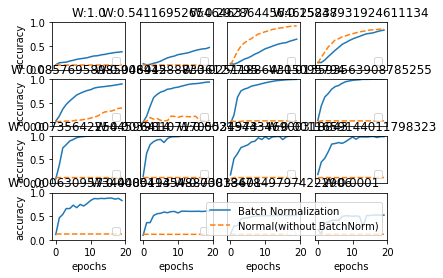

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method